In [1]:
#import libraries
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data        # features
y = iris.target      # labels

print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
# train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100, # number of trees
    max_depth=5, # maximum depth of each tree
    random_state=42 # for reproducibility
)

rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



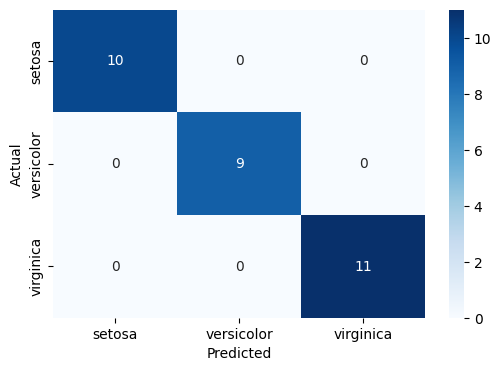

In [6]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
# compare with decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print("Decision Tree Accuracy:", dt.score(X_test, y_test))
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
